## Data Science and Business Analyst
### GRIP @ The Sparks Foundation

### PRESENTED BY DHRUV PANCHAL


## TASK 6 :- Prediction using Decision Tree Algorithm (Level - Intermediate)
- In this task, we will Create the Decision Tree classifier and visualize it graphically on the dataset "Iris" and try to find out if we feed any new data to this classifier, it would be able to predict the right class accordingly.
- Dataset: [https://bit.ly/3kXTdox](https://bit.ly/3kXTdox)


## Step 0: Importing Libraries that are needed to perform task

In [1]:
# Importing all the required libraries...
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import sklearn.metrics as sm

%matplotlib inline

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree


## Step 1 : Loading and Reading The Dataset

In [2]:
# Reading the Data...
data=pd.read_csv('Iris.csv',index_col=0)
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
data.columns

Index(['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [4]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

## Step 2 : Checking the Dataset's Information

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


**We can observe there are no null values.**

In [6]:
data.nunique()

SepalLengthCm    35
SepalWidthCm     23
PetalLengthCm    43
PetalWidthCm     22
Species           3
dtype: int64

In [7]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


**Now, let's check for unique classes in the dataset.**

In [8]:
print(data.Species.nunique())
print(data.Species.value_counts())

3
Iris-versicolor    50
Iris-virginica     50
Iris-setosa        50
Name: Species, dtype: int64


# Step 3 : Input Data Visualization

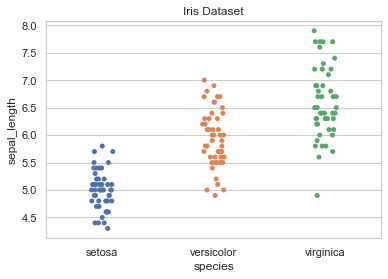

In [9]:
sns.set(style = 'whitegrid')
iris = sns.load_dataset('iris');
ax = sns.stripplot(x ='species',y = 'sepal_length',data = iris);
plt.title('Iris Dataset')
plt.show()

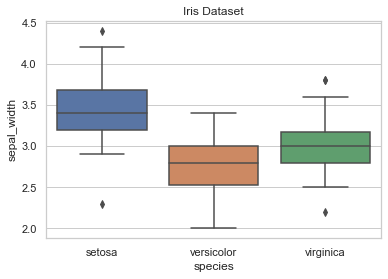

In [10]:
sns.boxplot(x='species',y='sepal_width',data=iris)
plt.title("Iris Dataset")
plt.show()

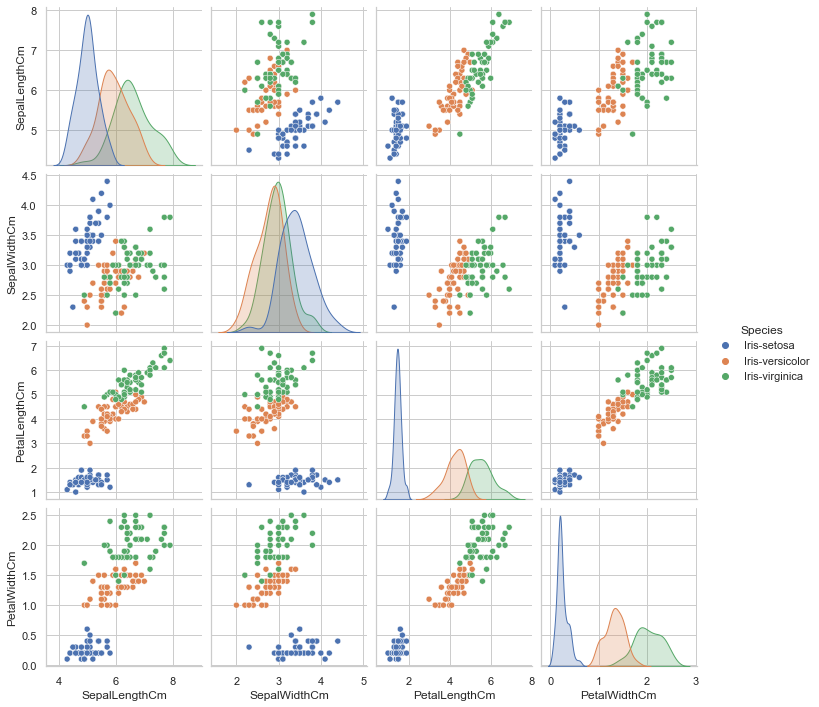

In [11]:
sns.pairplot(data, hue='Species')

We can observe that speciesv "Iris Setosa" makes a distinctive cluster in every parameter, while other two species overlap a bit each other.

# Step 4 : Finding the Correlation Matrix

In [12]:
data.corr()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


**In the next step, we will be using heatmap to visulaize data.**

<AxesSubplot:>

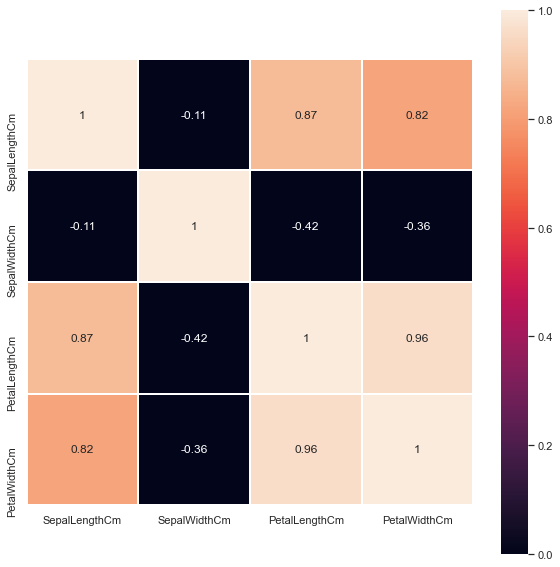

In [13]:
# Finding Correlation between variables of Iris Dataset
iris1 = data.corr() 
fig,ax=plt.subplots(figsize=(10,10))
sns.heatmap(iris1,vmin=0,vmax=1,square=True,annot=True,linewidth=1)

<AxesSubplot:>

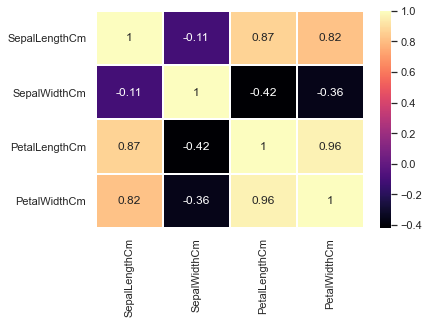

In [14]:
sns.heatmap(data.corr(), annot=True, linewidth=1, cmap='magma')

Here, we observed that:
- Petal length is highly related to petal width.
- Sepal length is not related to sepal width.
- Negative correlation of Sepal width with Petal length and Petal Width.

# Step 5 : Data Pre-processing

In [15]:
target=data['Species']
df=data.copy()
df=df.drop('Species', axis=1)
df.shape

(150, 4)

In [16]:
#defining the attributes and labels
X=data.iloc[:, [0,1,2,3]].values
le=LabelEncoder()
data['Species']=le.fit_transform(data['Species'])
y=data['Species'].values
data.shape

(150, 5)

# Step 6 : Training the Model

We will now split the data into test and train.

In [17]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)
print("Traingin split:",X_train.shape)
print("Testin spllit:",X_test.shape)

Traingin split: (120, 4)
Testin spllit: (30, 4)


**Defining the Decision Tree Algorithm**

In [18]:
dtree=DecisionTreeClassifier()
dtree.fit(X_train,y_train)
print("Decision Tree Classifier created!")

Decision Tree Classifier created!


# Step 7 : Classification Report and Confusion Matrix 

In [19]:
y_pred=dtree.predict(X_test)
print("Classification report:\n",classification_report(y_test,y_pred))

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.90      1.00      0.95         9
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [20]:
acc = sm.accuracy_score(y_test,y_pred)
print("The Accuracy is: {0}%".format(acc*100))

The Accuracy is: 96.66666666666667%


**The accuracy is 0.9666 or 96.66% since we took all the 4 Features of the Iris Dataset.**

In [21]:
# Confusion Matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[12,  0,  0],
       [ 0,  9,  0],
       [ 0,  1,  8]], dtype=int64)

# Step 8 : Visualization of the Trained Model

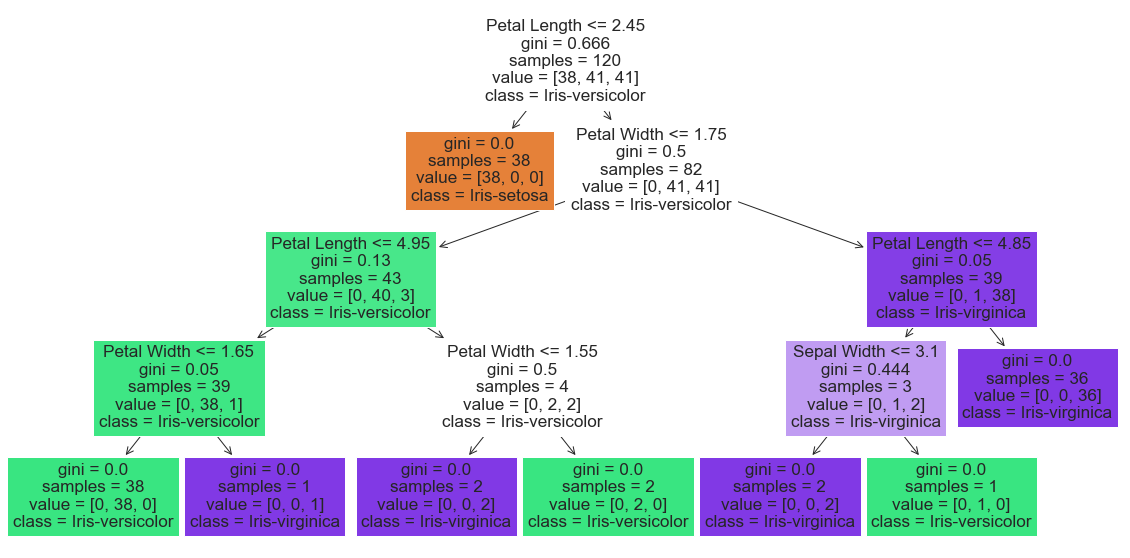

In [22]:
# Visualizing the Graph
plt.figure(figsize=(20,10))
feature=['Sepal Length','Sepal Width','Petal Length','Petal Width']
class_name =['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
plot_tree(dtree, filled = True,class_names=class_name,feature_names=feature);
plt.show()

## Testing for new points except from the given Dataset

In [23]:
Test_point = [[5.4,3.0,4.5,1.5],
             [6.5,2.8,4.6,1.5],
             [5.1,2.5,3.0,1.1],
             [5.1,3.3,1.7,0.5],
             [6.0,2.7,5.1,1.6],
             [6.0,2.2,5.0,1.5]]

print(dtree.predict(Test_point))

[1 1 1 0 1 2]


- The Descision Tree Classifier is created and is visaulized graphically. 
- Also the prediction was calculated using decision tree algorithm and accuracy of the model was evaluated and shown.

**Thank You**